In [6]:
#'tagText' → already encoded to 'tagText_encoded'
import pandas as pd

# Load the cleaned data from Phase 1
df = pd.read_csv('cleaned_furniture_data.csv')

# Quick check
df.head()


,productTitle,price,sold,tagText,shipping_price,tagText_encoded,final_price
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping,0.0,1,46.79
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping,0.0,1,169.72
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping,0.0,1,39.46
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping,0.0,1,111.99
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping,0.0,1,21.37


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


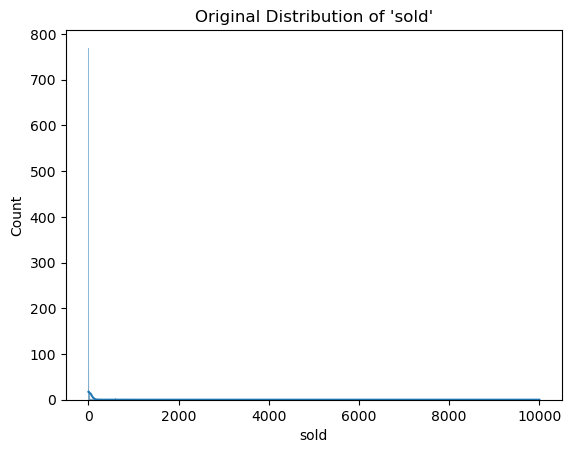

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


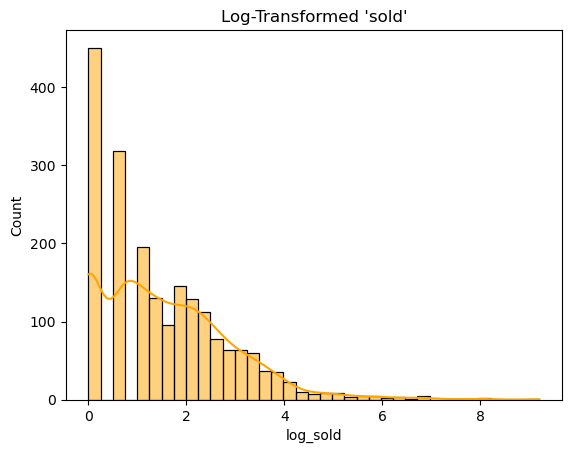

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check distribution first
sns.histplot(df['sold'], kde=True)
plt.title("Original Distribution of 'sold'")
plt.show()

# Apply log1p (log(x+1))
df['log_sold'] = np.log1p(df['sold'])

# Visualize again
sns.histplot(df['log_sold'], kde=True, color='orange')
plt.title("Log-Transformed 'sold'")
plt.show()


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limit features to top 100 words
tfidf = TfidfVectorizer(max_features=100)

# Transform titles into a sparse matrix
tfidf_matrix = tfidf.fit_transform(df['productTitle'])

# Convert matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Merge with original DataFrame
df = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

# Drop original productTitle
df.drop('productTitle', axis=1, inplace=True)


In [11]:
df.to_csv("engineered_furniture_data.csv", index=False)
